# Name: Vishakha Ganesh Jaurath  
## The Sparks Foundation - Data Science & Business Analytics Intern

### Exploratory Data Analysis - Retail

####  In this project I've done EDA on Superstore dataset to draw insights from it.

In [1]:
# Importing all libraries required for this project.

import pandas as pd
import numpy as np    
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading data from remote link.

df = pd.read_csv('superstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df.shape

(9994, 13)

In [7]:
df[df.duplicated(keep='first')]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


### Dropped the duplicates records.

In [8]:
df.drop_duplicates(keep='first', inplace= True)

In [9]:
df.shape

(9977, 13)

In [10]:
df['Country'].unique()

array(['United States'], dtype=object)

### Clearly the data is for US country only, so I've dropped the 'Country' column along with 'Postal Code' as I didn't need any analysis to be done based on them.

In [11]:
#dropping Country column

df=df.drop(['Country','Postal Code'],axis=1)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Category level analysis

In [12]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [13]:
#number of products in each category 

df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

In [14]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [15]:
#number of products in each sub-category

df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

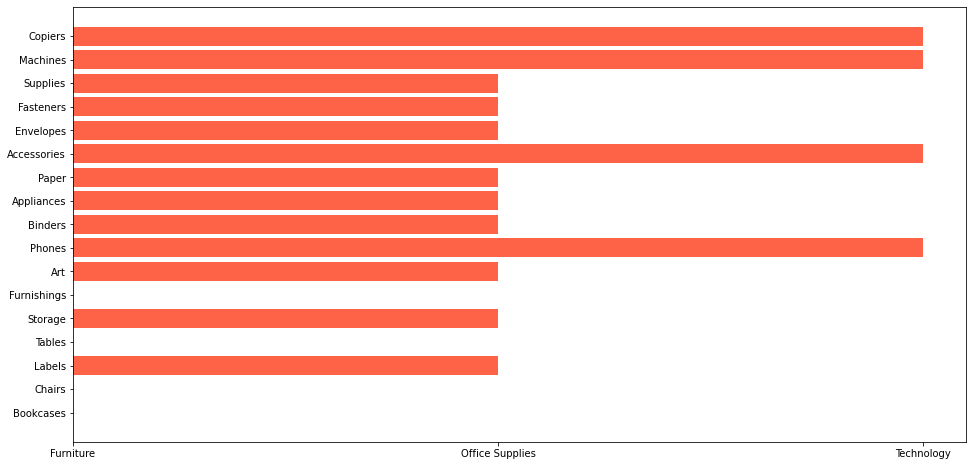

In [16]:
#Lets see how sub-categories are distributed along with category.

plt.figure(figsize=(16,8))
plt.barh('Sub-Category','Category',data=df,color='tomato')
plt.show()

##### From this graph, one can easily makeout which Category & Sub-Category to choose when they are looking to purchase a product.

### Total Profit and Sales per Category

<Figure size 1080x720 with 0 Axes>

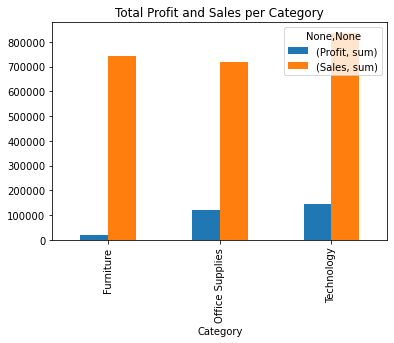

In [17]:
plt.figure(figsize=(15,10))
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Category')
plt.show()

##### Technology category has earned highest Profit and Sales than other categories.

### Total Profit and Sales per Sub-Category

<Figure size 1224x1440 with 0 Axes>

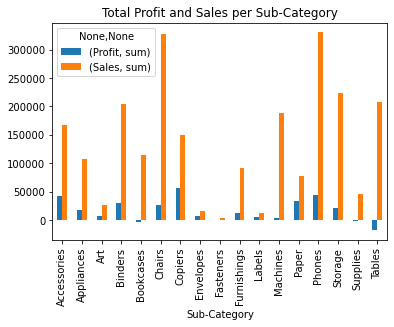

In [18]:
plt.figure(figsize=(17,20))
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

#### Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products. On the other hand Tables and Bookcases departments are in loss.

### Analysis based on Sub-Category and Region

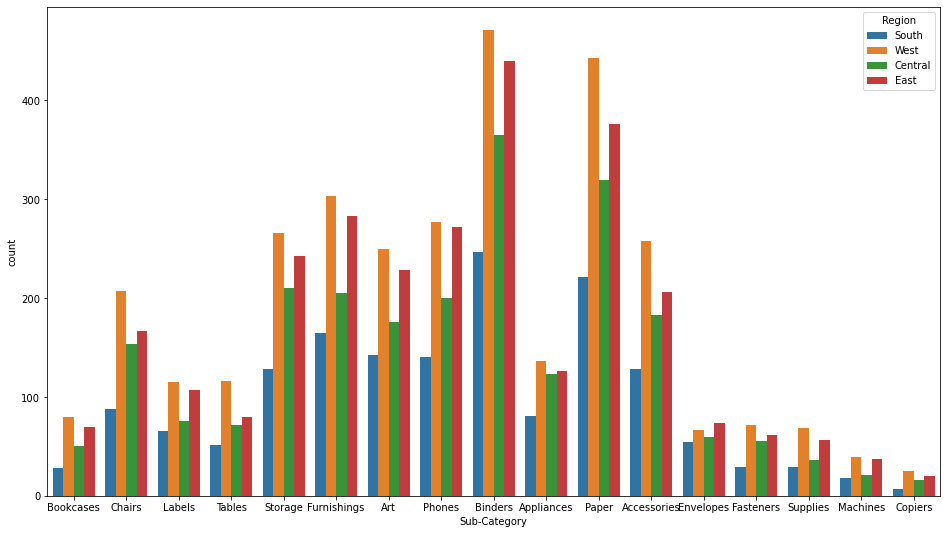

In [19]:
import seaborn as sns
plt.figure(figsize=(16,9))
sns.countplot("Sub-Category", hue="Region", data=df)
plt.show()

#### Customers from West followed by East region tend to order the most.

### Creating Cost column.

In [20]:
df['Cost']=df['Sales']-df['Profit']
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516


### Creating Profit % column.

In [21]:
df['Profit %']=(df['Profit']/df['Cost'])*100
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464,19.047619
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580,42.857143
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486,88.679245
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085,-28.571429
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516,12.676056


In [22]:
# Sub-Category with high Profit Percentage 

df.sort_values(['Profit %','Sub-Category'],ascending=False).groupby('Profit %').head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,Second Class,Home Office,Bayonne,New Jersey,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,Summerville,South Carolina,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
6338,Standard Class,Corporate,New York City,New York,East,Technology,Phones,87.800,4,0.0,43.9000,43.9000,100.000000
246,Second Class,Home Office,Lakeville,Minnesota,Central,Office Supplies,Paper,47.880,6,0.0,23.9400,23.9400,100.000000
381,First Class,Corporate,San Francisco,California,West,Office Supplies,Paper,50.960,7,0.0,25.4800,25.4800,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,Austin,Texas,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,Fort Worth,Texas,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,Chicago,Illinois,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,Pasadena,Texas,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


In [23]:
# Sub-Category with high Profit Percentage 

df.sort_values(['Profit %','Sub-Category'],ascending=False).groupby('Profit %').tail()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
61,First Class,Consumer,Troy,New York,East,Office Supplies,Art,1.680,1,0.0,0.8400,0.8400,100.000000
1504,Standard Class,Home Office,Los Angeles,California,West,Office Supplies,Art,6.720,4,0.0,3.3600,3.3600,100.000000
2352,Same Day,Corporate,Los Angeles,California,West,Office Supplies,Art,10.080,6,0.0,5.0400,5.0400,100.000000
5218,Standard Class,Corporate,New York City,New York,East,Office Supplies,Art,8.400,5,0.0,4.2000,4.2000,100.000000
9228,Same Day,Home Office,Los Angeles,California,West,Office Supplies,Art,6.720,4,0.0,3.3600,3.3600,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,Austin,Texas,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,Fort Worth,Texas,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,Chicago,Illinois,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,Pasadena,Texas,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


#### Phone from Technology category and Papers and Arts from Office Supplies have got 100% Profit in their Business without giving them any discount.

####  Appliances from Office Supplies has got -ve profit despite of giving them discount. Everytime the Purchasing quantity is also more than 2.